# @Holger Elias Rivera Espinola¶
# PROGRAMA DE RECONHECIMENTO DE PADRÕES
# CLASSIFICAÇÃO - MÁQUINAS DE VETORES DE SUPORTE

# CLASSIFICAÇÃO LINEAR - BRACA1 VS. BRACA2

In [1]:
#leitura do arquivo csv 
from csv import reader

#carregamento dos dados
def load_csv(filename):
    file=open(filename,"r")
    lines=reader(file)
    dataset=list(lines)
    return dataset

#executar leitura do arquivo csv
filename='data_breast_cancer.csv'
dataset=load_csv(filename)
print('Dados carregados do arquivo: {0} com #filas: {1} e #colunas: {2}'.format(filename,len(dataset),len(dataset[0])))

Dados carregados do arquivo: data_breast_cancer.csv com #filas: 3228 e #colunas: 23


In [2]:
#dataset para o problema 3
datasetp3=[]
j1=0
for j in range(1,len(dataset[0])):
    if dataset[-1][j]=='BRACA1':
        datasetp3.insert(j1,[dataset[i][j] for i in range(1,len(dataset))])
        datasetp3[j1][-1]=-1
        j1=j1+1
    elif dataset[-1][j]=='BRACA2':
        datasetp3.insert(j1,[dataset[i][j] for i in range(1,len(dataset))])
        datasetp3[j1][-1]=1
        j1=j1+1
        
#vista dos dados
#print(datasetp3)
print('#filas: {0} ; #colunas: {1}'.format(len(datasetp3),len(datasetp3[0])))

#filas: 15 ; #colunas: 3227


In [3]:
#criacao do x1 (braca1) e x2 (braca2)
def braca1_braca2(gene):
    lbraca=[]
    braca1=[]
    braca2=[]
    ib1=0
    ib2=0
    for i in range(len(datasetp3)):
        if datasetp3[i][-1]==-1:  #carateristica pertence a braca1
            braca1.insert(ib1,float(datasetp3[i][gene]))
            ib1=ib1+1
        else: #carateristica pertence a braca2
            braca2.insert(ib2,float(datasetp3[i][gene]))
            ib2=ib2+1
    lbraca.insert(0,braca1)
    lbraca.insert(1,braca2)
    return lbraca

#exemplo: para gene 271 e 1442
print(braca1_braca2(271))
print(braca1_braca2(1442))

[[2.05, 1.88, 1.52, 1.64, 1.67, 1.19, 1.59], [1.51, 1.3, 1.03, 1.39, 0.6613, 0.6689, 0.6924, 1.2432]]
[[1.19, 1.64, 1.44, 1.64, 1.07, 1.63, 1.52], [0.68, 0.95, 0.83, 0.63, 0.7916, 0.6842, 0.6891, 0.8303]]


In [4]:
#criacao do sn={[(gene_a)i,(gene_b)i],yi}
def criar_sn(genea,geneb):
    sn=[]
    x=[]
    y=[]
    x=braca1_braca2(genea)
    y=braca1_braca2(geneb)
    for i in range(0,len(x[0])):
        sn.insert(i,[x[0][i],y[0][i],-1])
    for i in range(0,len(x[1])):
        sn.insert((i+len(x[0])),[x[1][i],y[1][i],1])
    return sn

#exemplo: criar um sn para os genes 271 e 1442
print(criar_sn(271,1442))

[[2.05, 1.19, -1], [1.88, 1.64, -1], [1.52, 1.44, -1], [1.64, 1.64, -1], [1.67, 1.07, -1], [1.19, 1.63, -1], [1.59, 1.52, -1], [1.51, 0.68, 1], [1.3, 0.95, 1], [1.03, 0.83, 1], [1.39, 0.63, 1], [0.6613, 0.7916, 1], [0.6689, 0.6842, 1], [0.6924, 0.6891, 1], [1.2432, 0.8303, 1]]


In [5]:
import cvxopt as opt
from math import sqrt

In [6]:
# PROBLEMA PRIMAL
# 1) Min 1/2 * X.T*P*X + q.T*X
# 2) G*X <= h
c=10000

In [7]:
def gerar_matriz_aux(sn):
    y=[]    
    for i in range(0,len(sn)):
        y.append(sn[i][2])        
    aux=[]
    for i in range(0,len(sn)):
        aux.append([sn[i][0],sn[i][1],1])
    for i in range(0,len(aux)):
        for j in range(0,len(aux[0])):
            aux[i][j]=aux[i][j]*y[i]*(-1)
    return aux

#exemplo:
aux_prova=[]
aux_prova=gerar_matriz_aux(criar_sn(271,1442))
print(aux_prova)

[[2.05, 1.19, 1], [1.88, 1.64, 1], [1.52, 1.44, 1], [1.64, 1.64, 1], [1.67, 1.07, 1], [1.19, 1.63, 1], [1.59, 1.52, 1], [-1.51, -0.68, -1], [-1.3, -0.95, -1], [-1.03, -0.83, -1], [-1.39, -0.63, -1], [-0.6613, -0.7916, -1], [-0.6689, -0.6842, -1], [-0.6924, -0.6891, -1], [-1.2432, -0.8303, -1]]


In [8]:
def gerar_matriz_P(aux):
    P=[]
    #primeiras 3 filas (para w1, w2 e b)
    for i in range(0,len(aux[0])):
        v=[]
        for j in range(0,len(aux[0])+len(aux)):
            if i==j and j<=1:
                v.append(2.0)
            else:
                v.append(0.0)
        P.append(v)
    #posteriores "n" filas
    for i in range(0,len(aux)):
        v2=[]
        for j in range(0,len(aux[0])+len(aux)):
            v2.append(0.0)
        P.append(v2)
    P=opt.matrix(P)
    P=P.T
    return P
#exemplo:
P_prova=[]
P_prova=gerar_matriz_P(aux_prova)
print(P_prova)

[ 2.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  2.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]

In [9]:
def gerar_vetor_q(aux):
    q=[]
    for i in range(0,len(aux[0])):
        q.append(0.0)
    for j in range(0,len(aux)):
        q.append(c)
    q=opt.matrix(q)
    return q

#exemplo:
q_prova=[]
q_prova=gerar_vetor_q(aux_prova)
print(q_prova)

[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]



In [10]:
def gerar_matriz_G(aux):
    G=[]
    #primeiras "n" filas
    for i in range(0,len(aux)):
        v=[]
        for j in range(0,len(aux[0])):
            v.append(aux[i][j])
        for k in range(0,len(aux)):
            if i==k:
                v.append(-1.0)
            else:
                v.append(0.0)
        G.append(v)
    #as "n" filas posteriores
    for i in range(0,len(aux)):
        v2=[]
        for j in range(0,len(aux[0])):
            v2.append(0.0)
        for k in range(0,len(aux)):
            if i==k:
                v2.append(-1.0)
            else:
                v2.append(0.0)
        G.append(v2)
    #gerar formato matricial
    G=opt.matrix(G)
    G=G.T
    return G

#exemplo:
g_prova=[]
g_prova=gerar_matriz_G(aux_prova)
print(g_prova)


[ 2.05e+00  1.19e+00  1.00e+00 -1.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 1.88e+00  1.64e+00  1.00e+00  0.00e+00 -1.00e+00  0.00e+00  0.00e+00 ... ]
[ 1.52e+00  1.44e+00  1.00e+00  0.00e+00  0.00e+00 -1.00e+00  0.00e+00 ... ]
[ 1.64e+00  1.64e+00  1.00e+00  0.00e+00  0.00e+00  0.00e+00 -1.00e+00 ... ]
[ 1.67e+00  1.07e+00  1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 1.19e+00  1.63e+00  1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 1.59e+00  1.52e+00  1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[-1.51e+00 -6.80e-01 -1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[-1.30e+00 -9.50e-01 -1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[-1.03e+00 -8.30e-01 -1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[-1.39e+00 -6.30e-01 -1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[-6.61e-01 -7.92e-01 -1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[-6.69e-01 -6.84e-01 -1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]

In [11]:
def gerar_vetor_h(aux):
    h=[]
    for i in range(0,len(aux)):
        h.append(-1.0)
    for j in range(0,len(aux)):
        h.append(0.0)
    h=opt.matrix(h)
    return h

#exemplo:
h_prova=[]
h_prova=gerar_vetor_h(aux_prova)
print(h_prova)

[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]



In [12]:
def calcular_solucao(P,q,G,h):
    sol=opt.solvers.qp(P,q,G,h)
    z=[]
    z=sol['x']
    return z

#exemplo: para genes 271 e 1442
z_prova=[]
z_prova=calcular_solucao(P_prova,q_prova,g_prova,h_prova)
print(z_prova)
print(z_prova[len(aux_prova[0])])
print(z_prova[len(aux_prova[0])+len(aux_prova)-1])

     pcost       dcost       gap    pres   dres
 0: -9.7207e+08 -7.8074e+07  4e+08  1e+04  2e-15
 1: -5.7762e+07 -1.9255e+07  4e+07  8e+02  2e-13
 2:  3.9453e+06 -2.9076e+06  7e+06  1e-12  6e-15
 3:  4.8134e+05 -4.2298e+05  9e+05  3e-13  3e-16
 4:  6.9033e+04 -6.0432e+04  1e+05  9e-14  4e-16
 5:  9.9688e+03 -8.4977e+03  2e+04  3e-14  2e-16
 6:  1.4927e+03 -1.1475e+03  3e+03  1e-14  3e-16
 7:  2.4247e+02 -1.3224e+02  4e+02  6e-15  2e-16
 8:  5.0277e+01  1.3196e+00  5e+01  3e-15  3e-16
 9:  3.3668e+01  2.6995e+01  7e+00  1e-15  2e-16
10:  3.1739e+01  3.0564e+01  1e+00  9e-16  2e-16
11:  3.1040e+01  3.1028e+01  1e-02  1e-15  2e-16
12:  3.1033e+01  3.1033e+01  1e-04  9e-16  3e-16
13:  3.1033e+01  3.1033e+01  1e-06  8e-16  2e-16
Optimal solution found.
[-4.23e+00]
[-3.63e+00]
[ 9.94e+00]
[ 3.70e-12]
[ 3.70e-12]
[ 3.70e-12]
[ 3.70e-12]
[ 3.71e-12]
[ 3.70e-12]
[ 3.70e-12]
[ 3.70e-12]
[ 3.71e-12]
[ 3.70e-12]
[ 3.70e-12]
[ 3.70e-12]
[ 3.70e-12]
[ 3.70e-12]
[ 3.70e-12]

3.70122180536305e-12
3.70

In [13]:
def calcular_margem(z):
    margem=0
    margem=round((2.0)/sqrt(z[0]**2+z[1]**2),6)
    return margem

#exemplo para calculo de margem z_prova
mg_prova=calcular_margem(z_prova)
print(mg_prova)

0.35902


In [14]:
def lista_margens(datasetp3):    
    k=0
    epsilon=1e-8
    lmargens=[]
    for i in range(0,99):
        for j in range(i+1,100):
            sn=[]
            sn=criar_sn(i,j)
            aux=[]
            aux=gerar_matriz_aux(sn)
            P=[]
            P=gerar_matriz_P(aux)
            q=[]
            q=gerar_vetor_q(aux)
            G=[]
            G=gerar_matriz_G(aux)
            h=[]
            h=gerar_vetor_h(aux)            
            z=[]
            z=calcular_solucao(P,q,G,h)
            marg=0
            marg=calcular_margem(z)
            
            #condicao de problema linearmente separável
            lseparavel=1
            for ct in range(0,len(aux)):
                if z[ct+len(aux[0])]>epsilon:
                    lseparavel=0
            if lseparavel==1:
                lmargens.insert(k,[i,j,marg,[z[0],z[1],z[2]]]) # lmargem[i]=[genea,geneb,margem,[w1,w2,b]]
                k=k+1
    return lmargens

#verificando a lista de margens de todas as combinacoes
#para os primeiros 100 pares de genes
lm=[]
lm=lista_margens(datasetp3)
print(lm)

     pcost       dcost       gap    pres   dres
 0: -8.3331e+08 -3.5353e+07  4e+08  1e+04  4e-16
 1: -4.7641e+07 -7.0826e+06  4e+07  7e+02  2e-13
 2:  1.8477e+06 -4.4805e+05  5e+06  2e+01  6e-15
 3:  2.9675e+05  4.3001e+04  3e+05  8e-14  2e-14
 4:  9.7593e+04  5.0360e+04  5e+04  2e-14  5e-14
 5:  1.0462e+05  6.2161e+04  4e+04  1e-14  4e-14
 6:  9.6656e+04  5.8803e+04  4e+04  9e-15  2e-14
 7:  9.5028e+04  6.1026e+04  3e+04  7e-15  1e-14
 8:  8.1970e+04  6.4814e+04  2e+04  3e-15  1e-14
 9:  7.4747e+04  7.1995e+04  3e+03  7e-16  6e-15
10:  7.2914e+04  7.2699e+04  2e+02  5e-16  1e-14
11:  7.2792e+04  7.2727e+04  7e+01  5e-16  1e-13
12:  7.2762e+04  7.2737e+04  3e+01  8e-16  8e-14
13:  7.2745e+04  7.2745e+04  3e-01  6e-16  2e-13
14:  7.2745e+04  7.2745e+04  3e-03  5e-16  2e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.0711e+08 -2.4902e+07  3e+08  1e+04  6e-16
 1: -3.4011e+07 -3.4390e+06  3e+07  6e+02  1e-13
 2:  1.6107e+06  9.8706e+02  2e+06  5e+00  8e-1

In [ ]:
#funcao para escolher top10 de margens

In [15]:
def select_top10(lmarg):
    top10=[]
    lmarg.sort(reverse=True,key=lambda x:x[2])
    for i in range(0,10):
        top10.insert(i,lmarg[i])
    return top10

#obtendo a lista dos 10 melhores
best10x=[]
best10x=select_top10(lm)
print(best10x)

[[81, 94, 0.190423, [-10.412536847932959, 1.37512254929475, 0.8450223330719283]], [34, 45, 0.183705, [10.46606746678032, -2.99809230957807, -6.649495878051339]], [28, 37, 0.183306, [-8.284023684913343, 7.100591726435038, 5.958579895538812]], [28, 94, 0.179796, [-11.096774364837609, 0.7741936560978138, 12.045161286730314]], [2, 9, 0.173369, [-3.7735849402135315, -10.901467531613857, 14.42976947032747]], [60, 94, 0.170609, [-7.656710158859398, 8.876735403861202, -8.655448066144318]], [17, 97, 0.162854, [8.0771268302874, -9.250979981325779, -0.7649327449196115]], [1, 34, 0.158114, [-7.200003364119841, 10.399997746637531, -4.815996027049446]], [8, 94, 0.1581, [-12.484659675390843, 2.0398690491694493, 5.552621315299742]], [8, 34, 0.157522, [-7.268461048781622, 10.410305872265731, -5.224141585294058]]]


In [16]:
#criar relatorio de gráfica com pontos
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def relatorio(coef,sn,genea,geneb):
    #definicao dos pontos segundo sua classe
    br1=[]
    br2=[]
    for i in range(0,len(sn)):
        if sn[i][2]==-1:   #braca1
            br1.append(sn[i])
        else:              #braca2
            br2.append(sn[i])
    pontos_braca1=np.array(br1)
    pontos_braca2=np.array(br2)
    plt.grid()
    plt.scatter(pontos_braca1[:,0],pontos_braca1[:,1],c='blue')
    plt.scatter(pontos_braca2[:,0],pontos_braca2[:,1],c='red')
    
    #gráfica da superf. decisao e vetores de suporte    
    plt.title("Sup. Decisão: "+str(round(coef[0],3))+"*x1 + "+str(round(coef[1],3))+"*x2 + "+str(round(coef[2],3))+" = 0")
    plt.xlabel("gene #"+str(genea)+": "+dataset[genea+1][0])
    plt.ylabel("gene #"+str(geneb)+": "+dataset[geneb+1][0])
    plt.legend(['Braca1','Braca2'],loc='upper right')
    
    #superficie de decisao
    m=-coef[0]/coef[1]
    n=-coef[2]/coef[1]
    xspace=np.linspace(0.0,3.5)
    yspace=m*xspace+n
    plt.plot(xspace,yspace,'k-')
    
    #vetor de suporte braca1
    n1=(-1-coef[2])/coef[1]
    yspace1=m*xspace+n1
    plt.plot(xspace,yspace1,'k--')
    
    #vetor de suporte braca2
    n2=(1-coef[2])/coef[1]
    yspace2=m*xspace+n2
    plt.plot(xspace,yspace2,'k--')
    

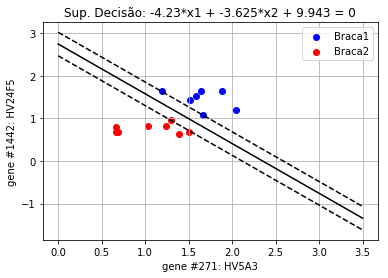

In [18]:
#provando gráfico para genes 271 e 1442
relatorio(z_prova,criar_sn(271,1442),271,1442)

[[81, 94, 0.190423, [-10.412536847932959, 1.37512254929475, 0.8450223330719283]], [34, 45, 0.183705, [10.46606746678032, -2.99809230957807, -6.649495878051339]], [28, 37, 0.183306, [-8.284023684913343, 7.100591726435038, 5.958579895538812]], [28, 94, 0.179796, [-11.096774364837609, 0.7741936560978138, 12.045161286730314]], [2, 9, 0.173369, [-3.7735849402135315, -10.901467531613857, 14.42976947032747]], [60, 94, 0.170609, [-7.656710158859398, 8.876735403861202, -8.655448066144318]], [17, 97, 0.162854, [8.0771268302874, -9.250979981325779, -0.7649327449196115]], [1, 34, 0.158114, [-7.200003364119841, 10.399997746637531, -4.815996027049446]], [8, 94, 0.1581, [-12.484659675390843, 2.0398690491694493, 5.552621315299742]], [8, 34, 0.157522, [-7.268461048781622, 10.410305872265731, -5.224141585294058]]]


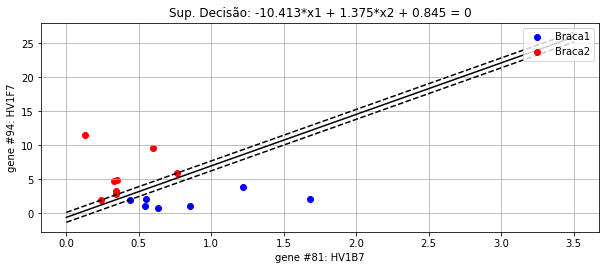

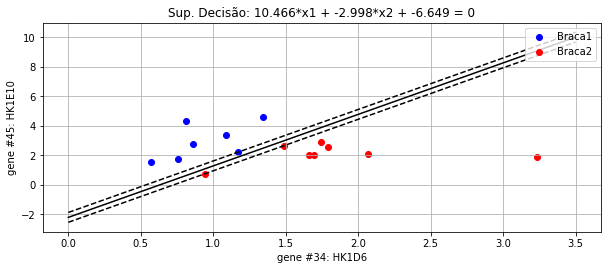

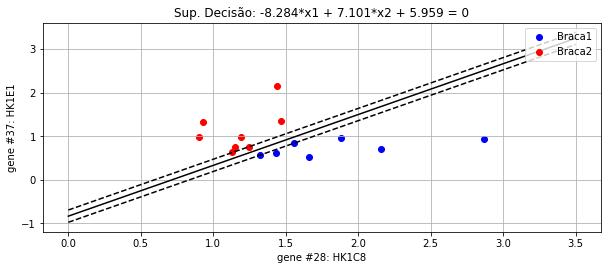

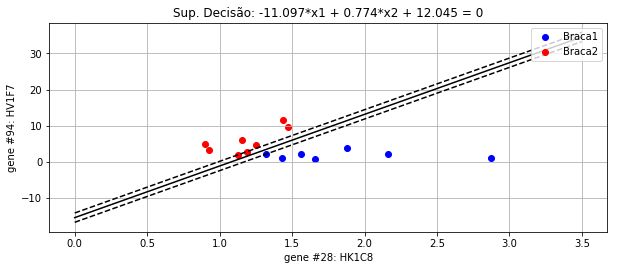

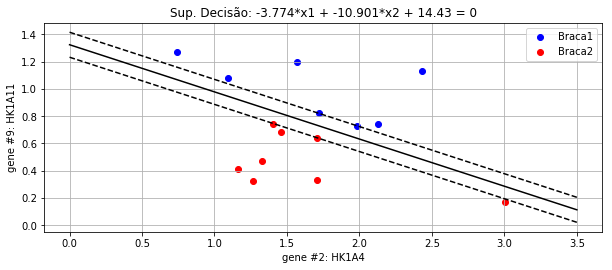

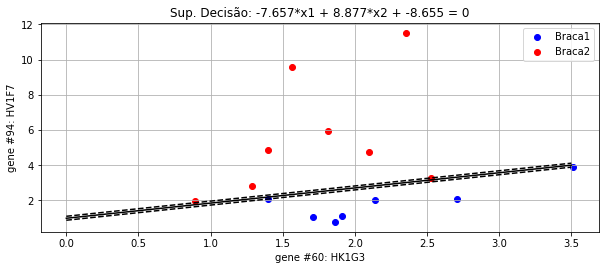

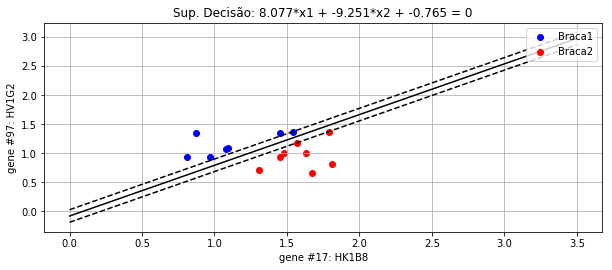

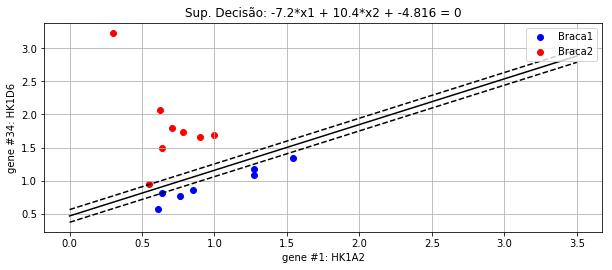

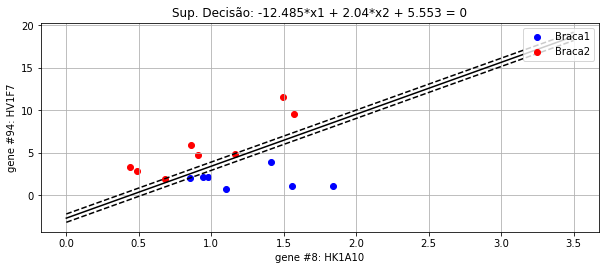

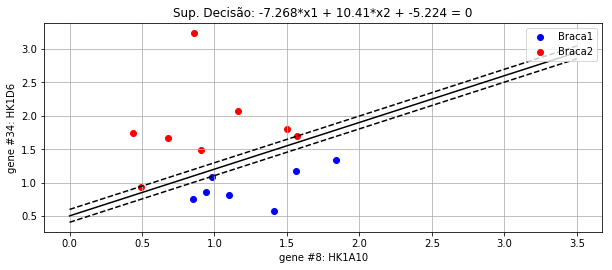

In [20]:
#gerar relatorio dos top10
def relatorio_top10(best10):
    for i in range(1,11):
        plt.figure(i,figsize=(10,50))
        plt.subplot(11,1,i)
        relatorio(best10[i-1][3],criar_sn(best10[i-1][0],best10[i-1][1]),best10[i-1][0],best10[i-1][1])

#imprimir relatorio dos 10 melhores
relatorio_top10(best10x)
print(best10x)